In [1]:
import sys
sys.path.append('../../src')
import apdft
from apdft.calculator.mrcc import MrccCalculator
import os
import numpy as np
from pyscf import gto
from pyscf.tools.cubegen import Cube
import scipy.interpolate as sci
import matplotlib.pyplot as plt
#os.chdir('data/coronene-dimer/mrcc-fast')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
#apdft.physics.APDFT()
c = MrccCalculator('CCSD', '6-31G')

In [3]:
basepath = 'data/coronene-dimer/mrcc-fast/'
nuclear_numbers, coordinates = apdft.read_xyz(basepath + 'inp.xyz')
p = apdft.physics.APDFT(2, nuclear_numbers, coordinates, basepath, c, include_atoms=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [4]:
def get_target_delta_z(target, ref):
    target, _ = apdft.read_xyz(target)
    ref, _ = apdft.read_xyz(ref)
    return target-ref
deltaZ = get_target_delta_z('data/validation-new/12-MIN-6-AB/run.xyz', basepath + 'inp.xyz')
sum(deltaZ)

0

In [5]:
betas = p.get_linear_density_coefficients(deltaZ)

In [6]:
gridcoord, gridweights = MrccCalculator.get_grid(None, None, p.get_folder_order()[0])

In [7]:
result = 0
for folder, weight in zip(p.get_folder_order(), betas):
    #print (folder)
    result += MrccCalculator.density_on_grid(folder + 'DENSITY', gridcoord) * weight

In [8]:
# do projection directly, all in one cartesian plane
yval = coordinates[:32, 1].mean()
grid_x, grid_y = np.mgrid[-7:7:50j, -7:7:50j]

In [56]:
gridded = sci.griddata(gridcoord, result, (grid_x, grid_x*0+yval, grid_y), method='nearest')

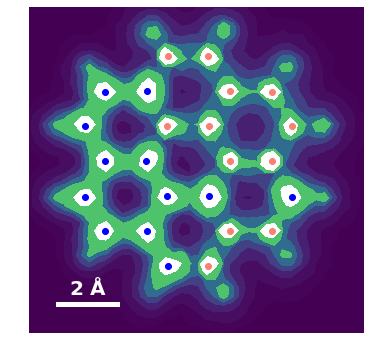

In [64]:
f = plt.figure(figsize=(6,6))
levels = np.percentile(gridded, np.arange(0, 100, 8))
plt.contourf(grid_x, grid_y, gridded, levels=levels, antialiasing=True)
plt.scatter(coordinates[np.where(deltaZ > 0), 0], coordinates[np.where(deltaZ > 0), 2], color='blue')
plt.scatter(coordinates[np.where(deltaZ < 0), 0], coordinates[np.where(deltaZ < 0), 2], color='salmon')

plt.plot((-5.2, -3.2), (-5, -5), lw=5, color='white')
plt.annotate(r'2 $\rm{\bf\AA}$', (-4.2, -4.8), ha='center', va='bottom', color='white', size='20', weight='bold')

plt.xlim(-6.2, 5.2)
plt.ylim(-6, 5.4)
plt.axis('off')
plt.savefig('coronene-min-den-pred.pdf', bbox_inches='tight')

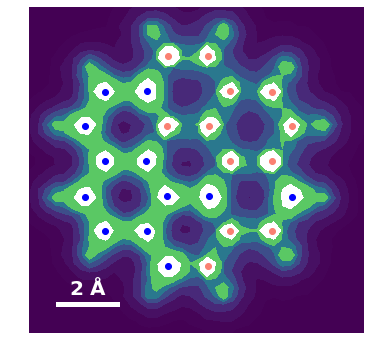

In [63]:
def plot_ref():
    path = 'data/validation-density/12-MIN-6-AB/'
    gridcoord, gridweights = MrccCalculator.get_grid(None, None, path)
    density = MrccCalculator.density_on_grid(path + 'DENSITY', gridcoord)
    gridded = sci.griddata(gridcoord, density, (grid_x, grid_x*0+yval, grid_y), method='nearest')
    f = plt.figure(figsize=(6,6))
    levels = np.percentile(gridded, np.arange(0, 100, 8))
    plt.contourf(grid_x, grid_y, gridded, levels=levels)
    plt.scatter(coordinates[np.where(deltaZ > 0), 0], coordinates[np.where(deltaZ > 0), 2], color='blue')
    plt.scatter(coordinates[np.where(deltaZ < 0), 0], coordinates[np.where(deltaZ < 0), 2], color='salmon')
    plt.plot((-5.2, -3.2), (-5, -5), lw=5, color='white')
    plt.annotate(r'2 $\rm{\bf\AA}$', (-4.2, -4.8), ha='center', va='bottom', color='white', size='20', weight='bold')

    plt.xlim(-6.2, 5.2)
    plt.ylim(-6, 5.4)
    plt.axis('off')
    plt.savefig('coronene-min-den-true.pdf', bbox_inches='tight')
plot_ref()